In [ ]:
import os
import path_file
os.chdir(os.path.dirname(os.path.dirname(path_file.__file__)))
os.getcwd()

In [8]:
import sys
import cantera as ct
import numpy as np
import scipy.optimize as opt
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib.legend_handler import HandlerTuple

import phases
import feedstock as fs
import fuel as fu
import energy as en
import gasifier as gs

In [9]:
coalUltimate = [59.30, 6.16, 29.63, 1.08, 3.82, 0.01]
coalAshWB = 0.431
coalMoistWB = 0.111
coalHHV = 13.386 # MJ/kg
coalLHV = 12.686 # MJ/kg
coalAshComp = [29.54, 1.02, 9.02, 4.21, 0.16, 0.70, 0.41, 0.03, 0.36, 0, 0]

coalAsh = coalAshWB / (1 - coalMoistWB)
coalMoist = coalMoistWB / (1 - coalMoistWB)

coal = fs.create_fuel_stream(1, coalUltimate, coalAsh, coalMoist, HHV=coalHHV, LHV=coalLHV, ashComposition=coalAshComp)

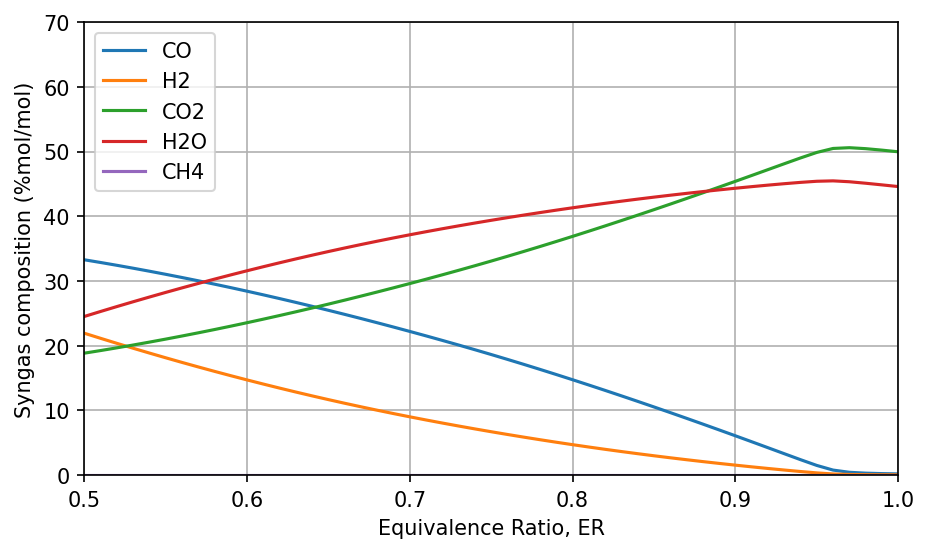

In [14]:
P = 101325 # Pa
ERs = np.arange(0.5, 1.0+1E-6, 0.01)
OUT1 = []

for j, er in enumerate(ERs):
    air = fs.create_air_from_ER(coal, er)
    outlet1 = gs.gasify_nonisot(coal, air, P=P, heatLossFraction=0, charFormation=0, directMethaneConv=0)
    OUT1.append(outlet1)

species = ['CO', 'H2', 'CO2', 'H2O', 'CH4']
y1 = np.zeros((len(species), len(OUT1)))

for i, sp in enumerate(species):
    composition = [out.get_syngas_fraction(sp, water=True, nitrogen=False) for out in OUT1]
    y1[i] = composition

fig1 = plt.figure(figsize=(7,4), dpi=150)
for i, sp in enumerate(species):
    plt.plot(ERs, 100*y1[i], label=sp)
plt.xlim(ERs[0], ERs[-1])
plt.ylim(0, 70)
plt.xticks(np.arange(ERs[0], ERs[-1]+1E-6, 0.1))
plt.legend()
plt.xlabel('Equivalence Ratio, ER')
plt.ylabel('Syngas composition (%mol/mol)')
plt.grid()
plt.show()